### Persistent homology examples

* Ripser [paper](https://www.theoj.org/joss-papers/joss.00925/10.21105.joss.00925.pdf) [code](https://github.com/scikit-tda/ripser.py) (fast)
* Dionysus 2 [code](https://mrzv.org/software/dionysus2/) (representative examples)
* Nico's [code](https://github.com/nhchristianson/Math-text-semantic-networks)
* Ann's [code](https://github.com/asizemore/PH_tutorial/blob/master/Tutorial_day1.ipynb)

In [1]:
%load_ext autoreload
%autoreload 2

### Persistent homology for all topics

In [2]:
topics = ['anatomy', 'biochemistry', 'cognitive science', 'evolutionary biology',
          'genetics', 'immunology', 'molecular biology']
topics += ['chemistry', 'biophysics', 'energy', 'optics', 
           'earth science', 'geology', 'meteorology']
# philosophy
# topics += []
topics += ['philosophy of language', 'philosophy of law', 
           'philosophy of mind', 'philosophy of science']
# social sciences
topics += ['economics', 'accounting', 'education', 'linguistics',
           'law', 'psychology', 'sociology']
# technology & applied sciences
topics += ['electronics', 'software engineering', 'robotics']
topics += ['physics']

In [3]:
path_saved = '/Users/harangju/Box Sync/Research/my papers/wikipedia paper/data/graphs/full/'

In [4]:
import wiki

networks = {}
for topic in topics:
    networks[topic] = wiki.Net()
    networks[topic].load_graph(path_saved + topic + '.gexf')
networks

{'anatomy': <wiki.Net at 0x7f9e38911978>,
 'biochemistry': <wiki.Net at 0x7f9e29b62fd0>,
 'cognitive science': <wiki.Net at 0x7f9e29811f98>,
 'evolutionary biology': <wiki.Net at 0x7f9e294cfef0>,
 'genetics': <wiki.Net at 0x7f9e2973ddd8>,
 'immunology': <wiki.Net at 0x7f9e2973d978>,
 'molecular biology': <wiki.Net at 0x7f9e2973d7b8>,
 'chemistry': <wiki.Net at 0x7f9e2973d470>,
 'biophysics': <wiki.Net at 0x7f9e2973dc18>,
 'energy': <wiki.Net at 0x7f9e29cdc0b8>,
 'optics': <wiki.Net at 0x7f9e29cb7f60>,
 'earth science': <wiki.Net at 0x7f9e29468128>,
 'geology': <wiki.Net at 0x7f9e29d0dfd0>,
 'meteorology': <wiki.Net at 0x7f9e29cfbfd0>,
 'philosophy of language': <wiki.Net at 0x7f9e2964fcf8>,
 'philosophy of law': <wiki.Net at 0x7f9e29641d30>,
 'philosophy of mind': <wiki.Net at 0x7f9e296417f0>,
 'philosophy of science': <wiki.Net at 0x7f9e29637710>,
 'economics': <wiki.Net at 0x7f9e29637208>,
 'accounting': <wiki.Net at 0x7f9e29637fd0>,
 'education': <wiki.Net at 0x7f9e29a58b38>,
 'ling

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib._color_data as mcd

sns.set(style='white', font_scale=2)
def plot_barcodes(barcodes):
    """
    """
    colors = [mcd.XKCD_COLORS['xkcd:'+c]
          for c in ['emerald green', 'tealish', 'peacock blue', 
                    'grey', 'brown', 'red', 'yellow']]
    plt.figure(figsize=(15,6))
    for i, row in barcodes.iterrows():
        birth = row['birth']
        death = row['death']
        x = [birth, 2050] if death==np.inf else\
            [birth, death]
        plt.plot(x, i*np.ones(len(x)), colors[row['dim']])
        if death != np.inf:
            plt.plot(death, i, 'r.')
    plt.axvline(x=2040, linestyle='--', color=mcd.XKCD_COLORS['xkcd:grey'])
    plt.gca().axes.yaxis.set_ticklabels([])

In [6]:
def plot_persistence_diagram(barcodes):
    colors = [mcd.XKCD_COLORS['xkcd:'+c]
      for c in ['emerald green', 'tealish', 'peacock blue', 
                'grey', 'brown', 'red', 'yellow']]
    plt.figure(figsize=(10,10))
    for dim in set(barcodes['dim']):
        data = barcodes.loc[barcodes['dim']==dim]
        data.loc[data['death']==np.inf,'death'] = 2030
        plt.plot(data['birth'], data['death'], '.')
    x = [barcodes['birth'].min(),
         barcodes.loc[barcodes['death']!=np.inf,'death'].max()]
    print(x)
    plt.plot(x, [2030, 2030], '--')

Topic: anatomy
wiki.Net: computing barcodes... (skip negatives)
wiki.Net: barcode 13081/13087
CPU times: user 1min 25s, sys: 1.11 s, total: 1min 26s
Wall time: 1min 26s
Topic: biochemistry
wiki.Net: computing barcodes... (skip negatives)
wiki.Net: barcode 11234/11251
CPU times: user 1min 1s, sys: 932 ms, total: 1min 2s
Wall time: 1min 2s
Topic: cognitive science
wiki.Net: computing barcodes... (skip negatives)
wiki.Net: barcode 794/796
CPU times: user 1.82 s, sys: 82.5 ms, total: 1.91 s
Wall time: 1.88 s
Topic: evolutionary biology
wiki.Net: computing barcodes... (skip negatives)
wiki.Net: barcode 2143/2171
CPU times: user 3.76 s, sys: 190 ms, total: 3.95 s
Wall time: 3.87 s
Topic: genetics
wiki.Net: computing barcodes... (skip negatives)
wiki.Net: barcode 9743/9748
CPU times: user 50.3 s, sys: 962 ms, total: 51.3 s
Wall time: 51.3 s
Topic: immunology
wiki.Net: computing barcodes... (skip negatives)
wiki.Net: barcode 1775/1777
CPU times: user 4.39 s, sys: 174 ms, total: 4.57 s
Wall tim

IndexError: list index out of range

Topic: biophysics
wiki.Net: computing barcodes... (skip negatives)
wiki.Net: barcode 908/909
CPU times: user 2.82 s, sys: 94.3 ms, total: 2.92 s
Wall time: 2.88 s
Topic: energy
wiki.Net: computing barcodes... (skip negatives)
wiki.Net: barcode 352/371
CPU times: user 537 ms, sys: 41.9 ms, total: 579 ms
Wall time: 561 ms
Topic: optics
wiki.Net: computing barcodes... (skip negatives)
wiki.Net: barcode 2511/2514
CPU times: user 4.93 s, sys: 229 ms, total: 5.16 s
Wall time: 5.06 s
Topic: earth science
wiki.Net: computing barcodes... (skip negatives)
wiki.Net: barcode 565/567
CPU times: user 784 ms, sys: 54.2 ms, total: 838 ms
Wall time: 808 ms
Topic: geology
wiki.Net: computing barcodes... (skip negatives)
wiki.Net: barcode 355/355
CPU times: user 474 ms, sys: 34.1 ms, total: 508 ms
Wall time: 490 ms
Topic: meteorology
wiki.Net: computing barcodes... (skip negatives)
wiki.Net: barcode 3460/3460
CPU times: user 7.56 s, sys: 294 ms, total: 7.85 s
Wall time: 7.71 s
Topic: philosophy of langua

/anaconda3/envs/wikinet/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


CPU times: user 2.91 s, sys: 162 ms, total: 3.07 s
Wall time: 2.99 s
Topic: linguistics
wiki.Net: computing barcodes... (skip negatives)
wiki.Net: barcode 3662/3668
CPU times: user 9.58 s, sys: 291 ms, total: 9.87 s
Wall time: 9.73 s
Topic: law
wiki.Net: computing barcodes... (skip negatives)
wiki.Net: barcode 13752/13816
CPU times: user 1min 41s, sys: 1.16 s, total: 1min 42s
Wall time: 1min 42s
Topic: psychology
wiki.Net: computing barcodes... (skip negatives)
wiki.Net: barcode 6557/6558
CPU times: user 29.9 s, sys: 629 ms, total: 30.6 s
Wall time: 30.3 s
Topic: sociology
wiki.Net: computing barcodes... (skip negatives)
wiki.Net: barcode 2231/2234
CPU times: user 4.44 s, sys: 217 ms, total: 4.66 s
Wall time: 4.54 s
Topic: electronics
wiki.Net: computing barcodes... (skip negatives)
wiki.Net: barcode 6205/6211
CPU times: user 21.1 s, sys: 531 ms, total: 21.6 s
Wall time: 21.3 s
Topic: software engineering
wiki.Net: computing barcodes... (skip negatives)
wiki.Net: barcode 1204/1219
CPU 

IndexError: list index out of range

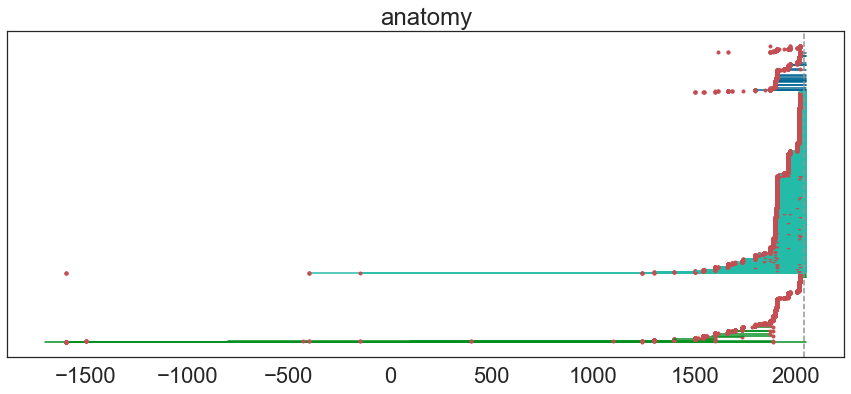

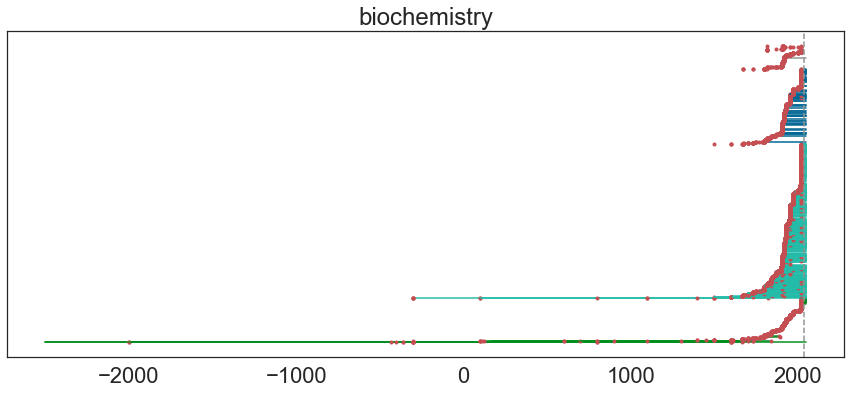

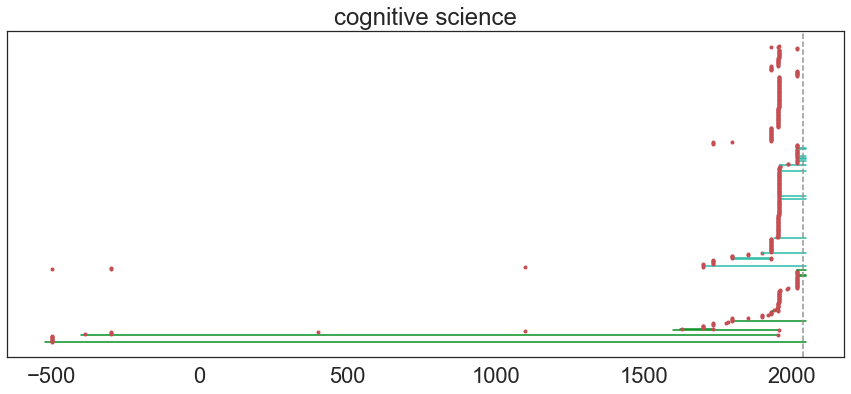

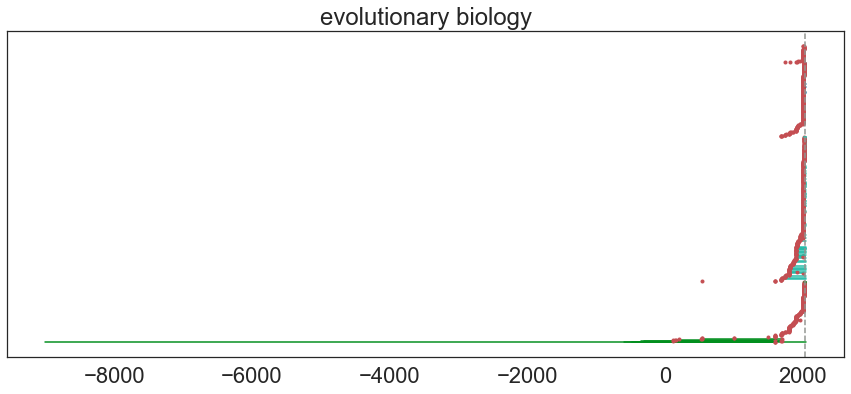

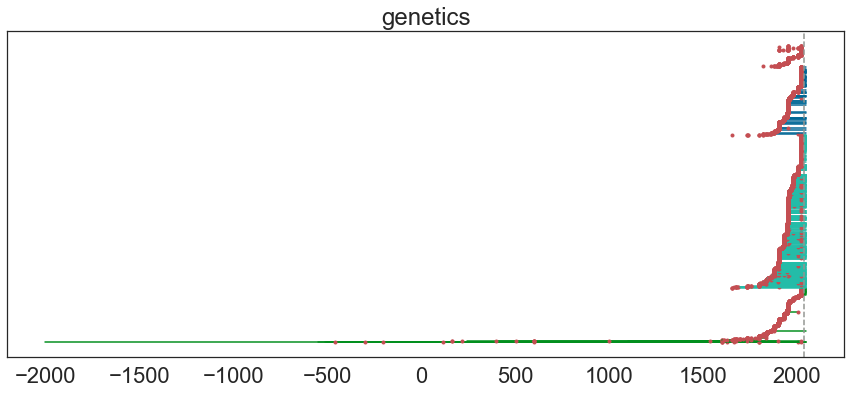

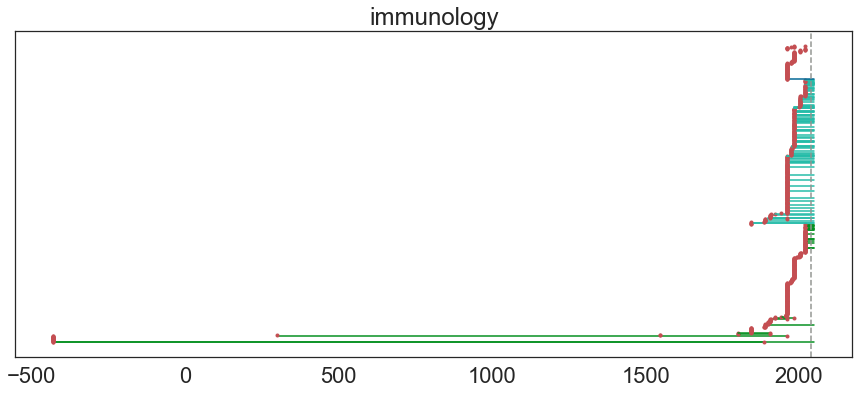

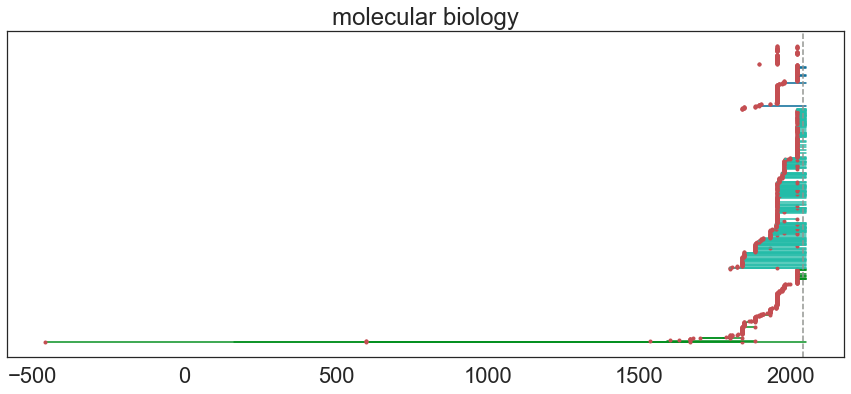

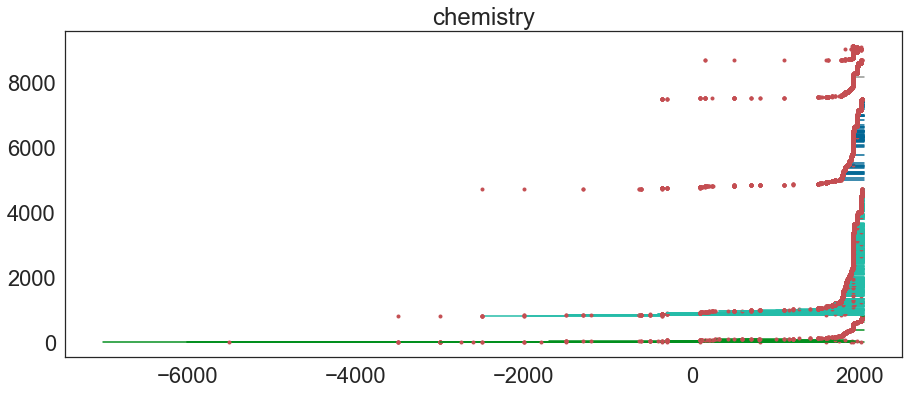

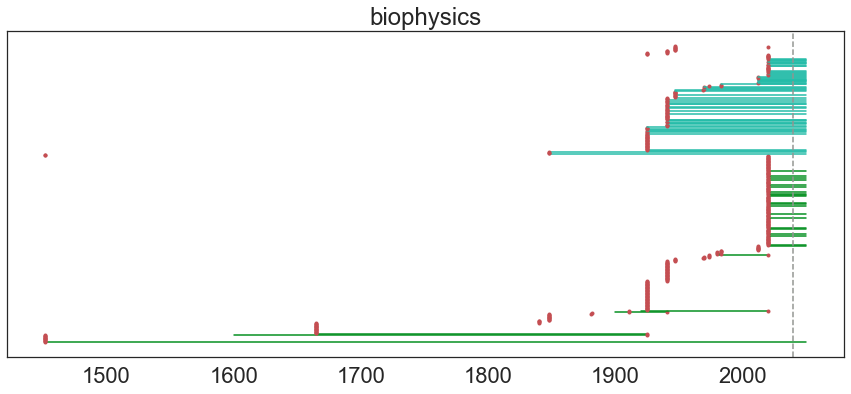

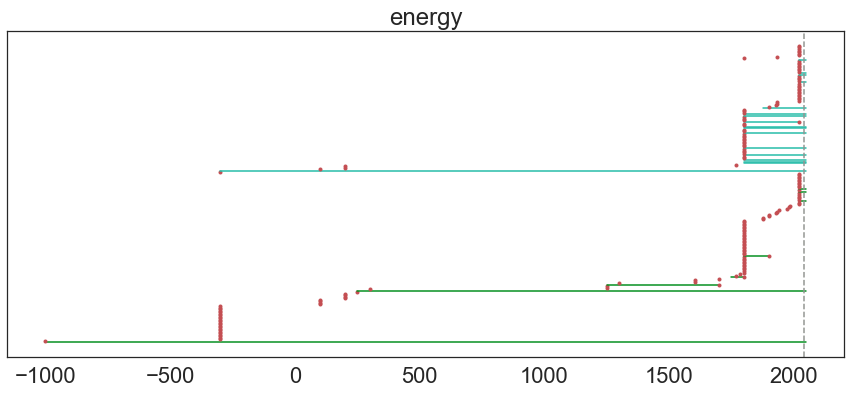

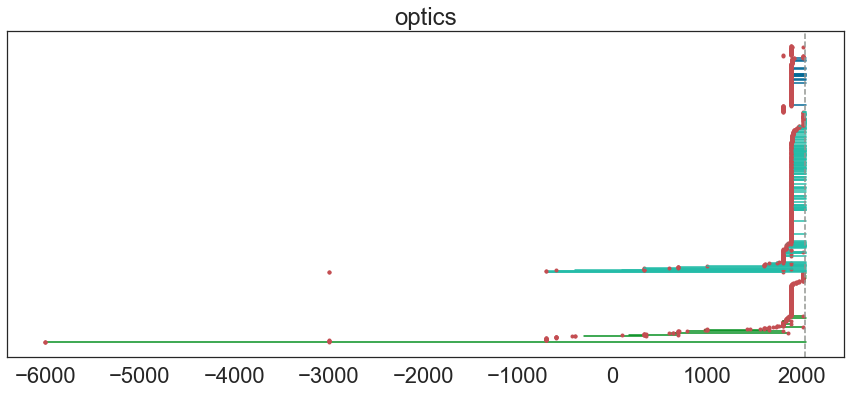

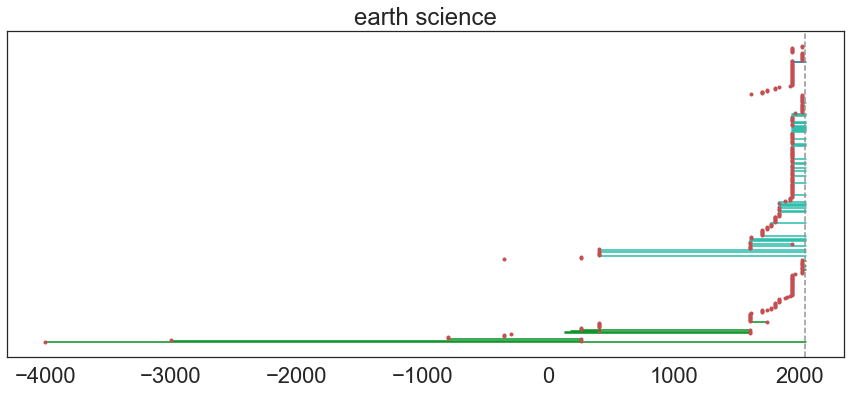

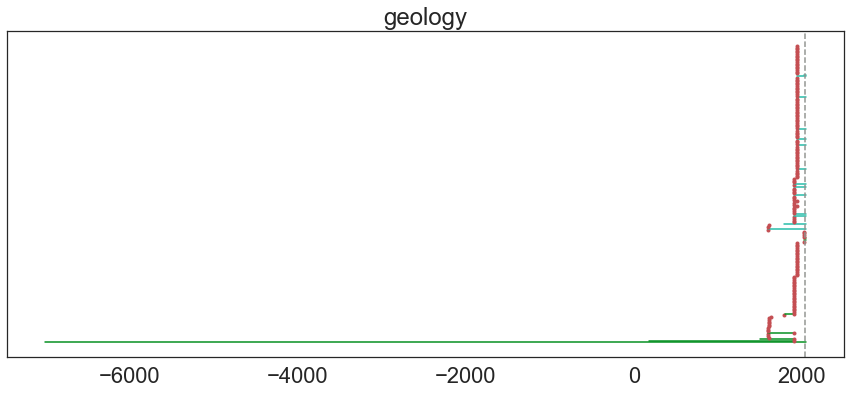

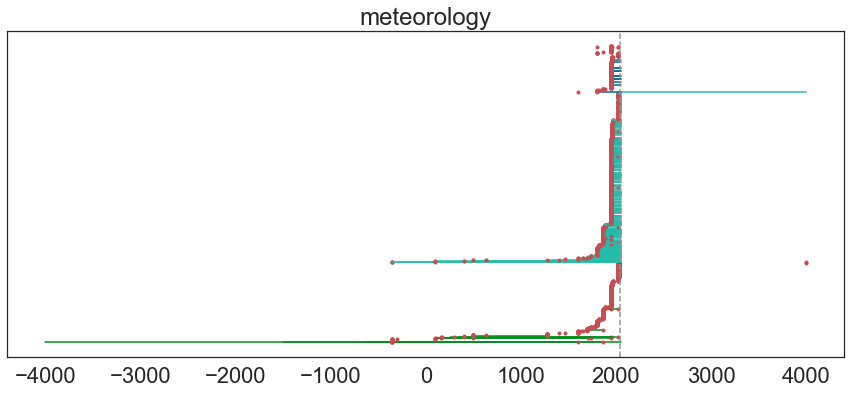

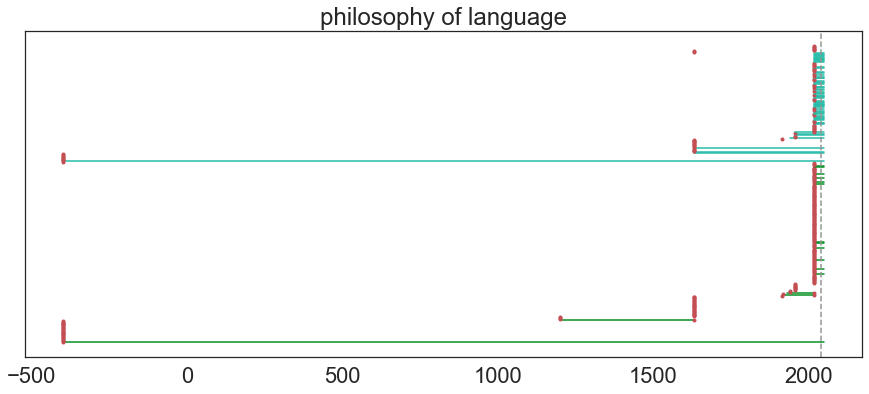

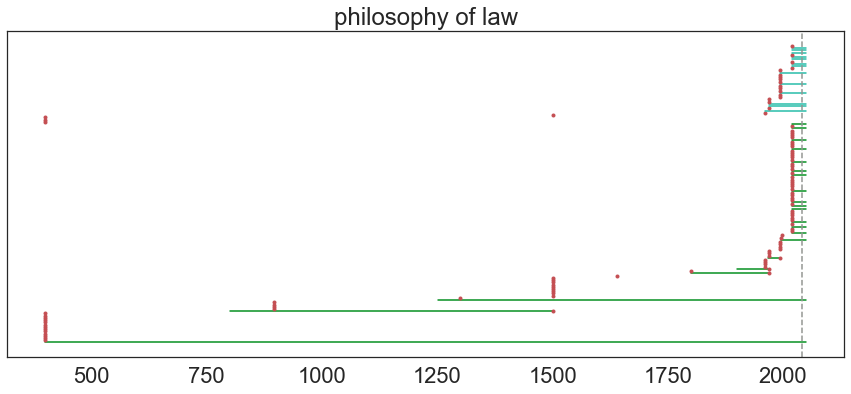

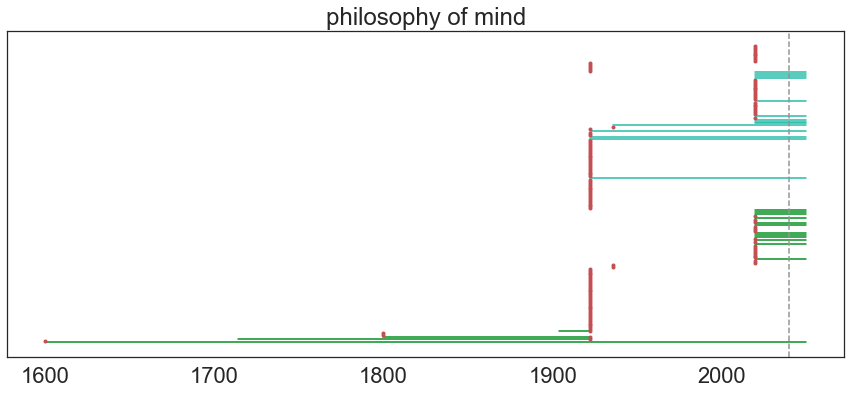

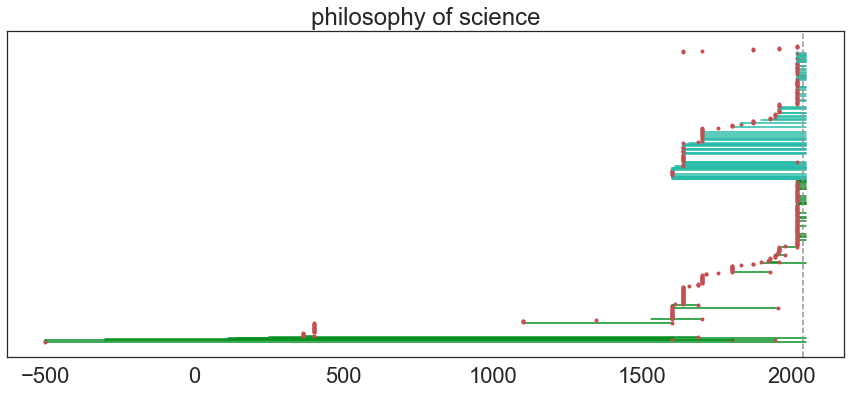

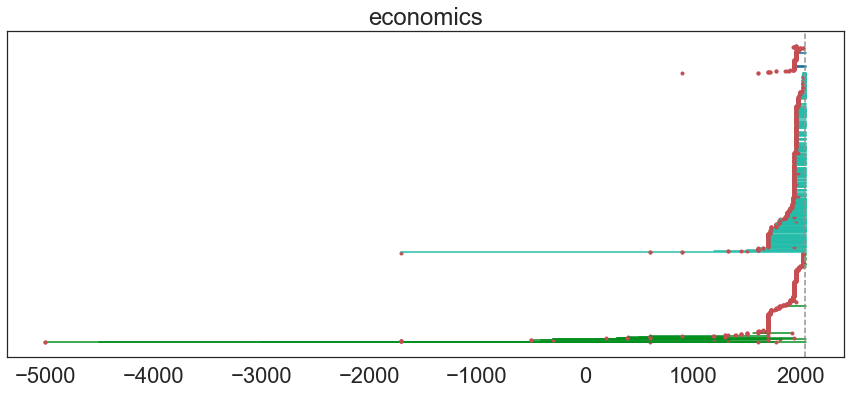

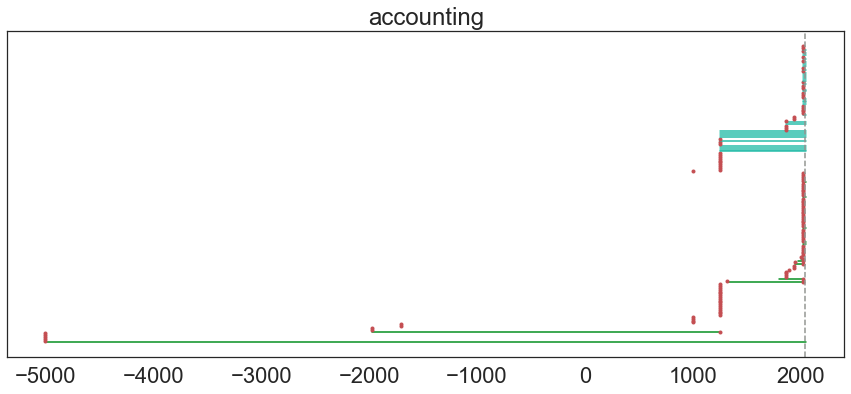

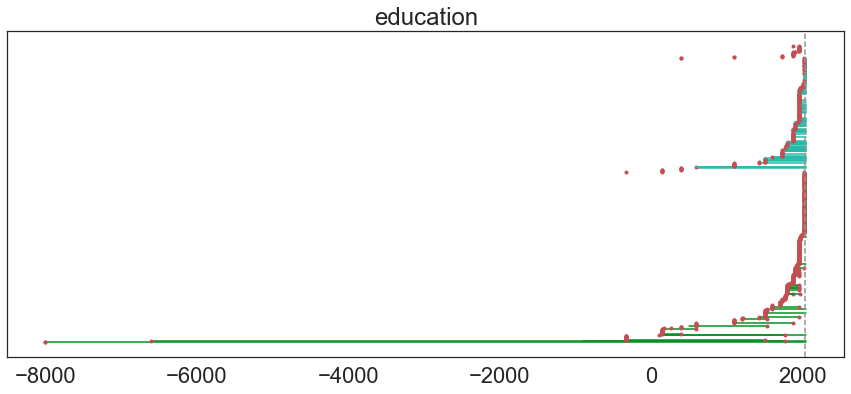

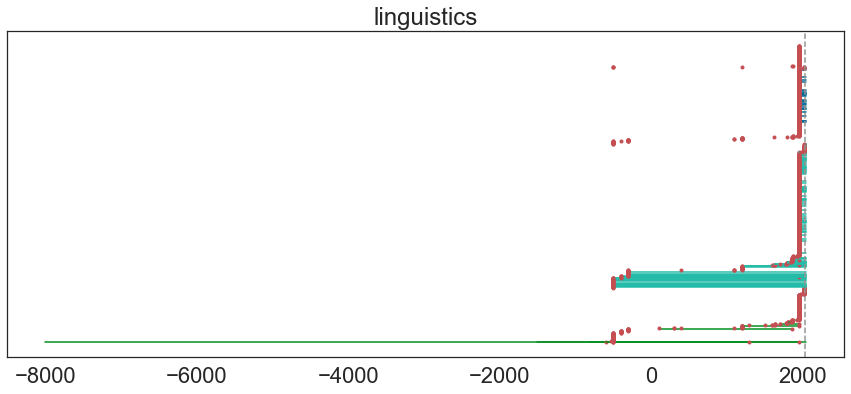

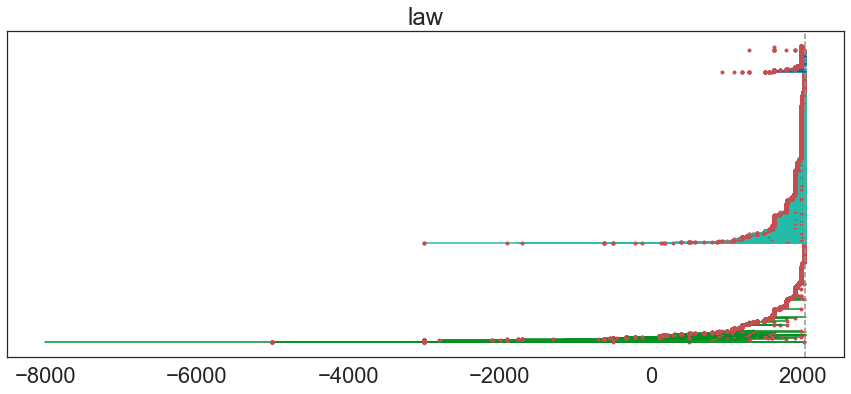

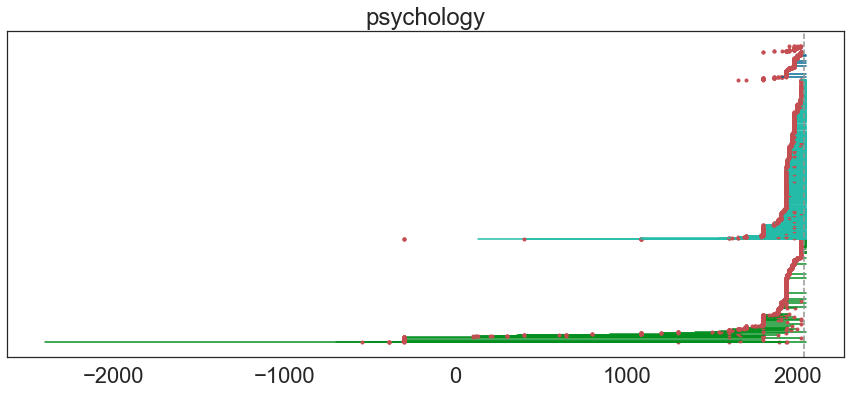

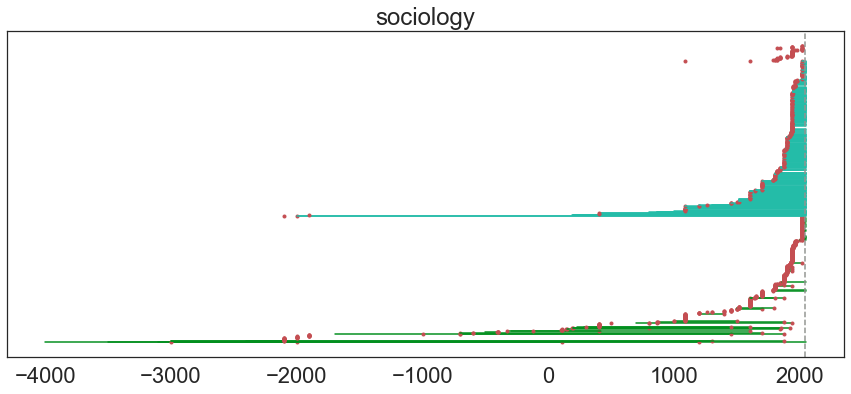

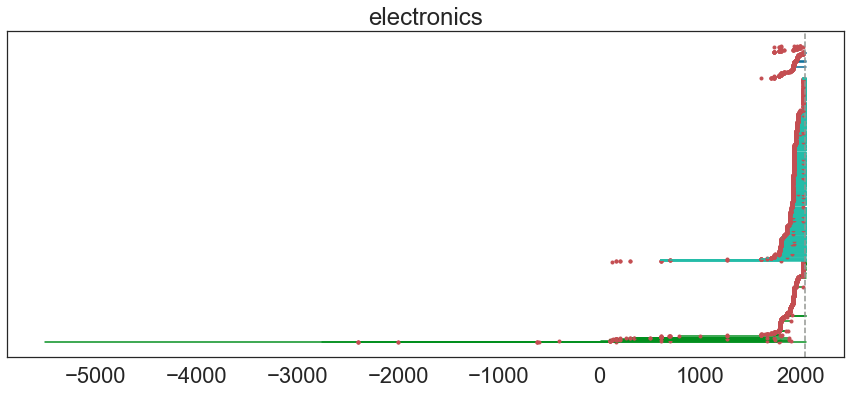

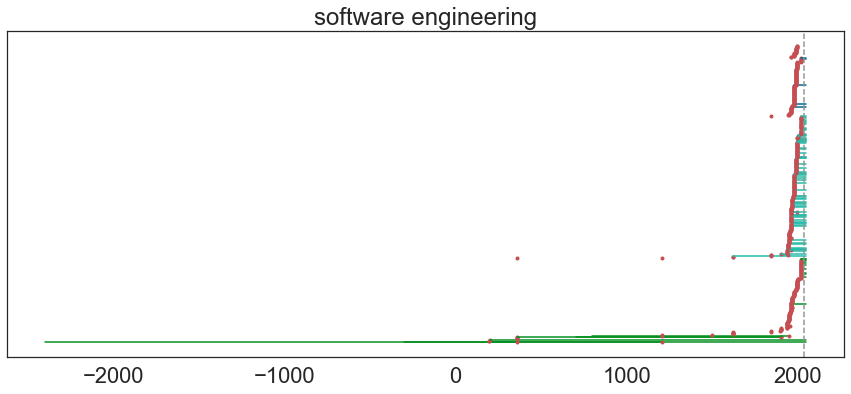

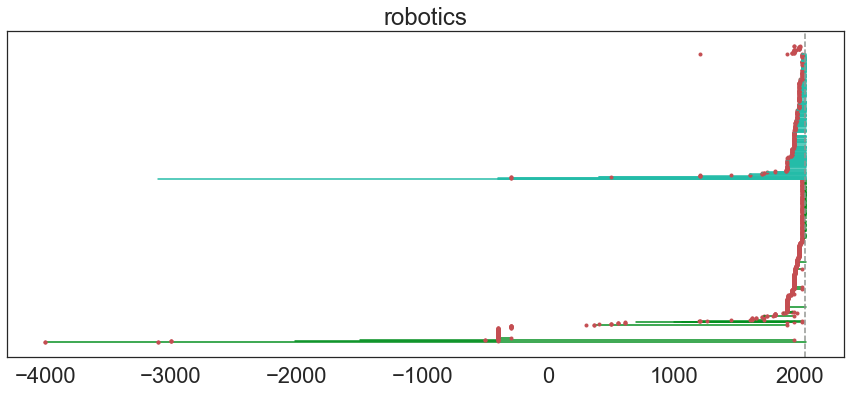

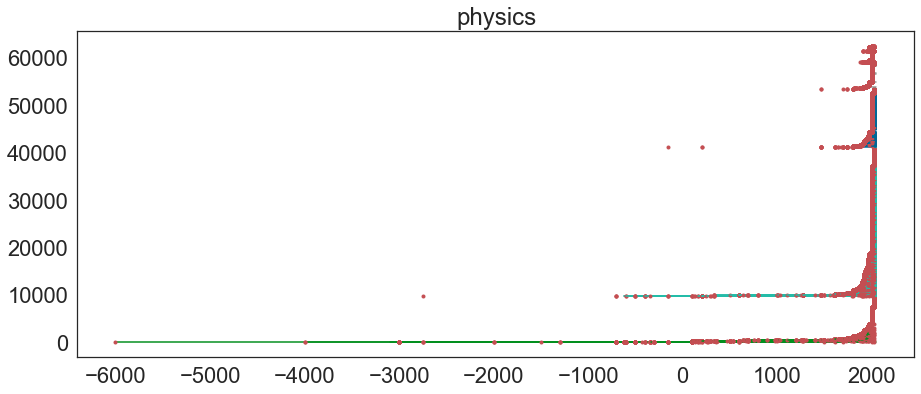

In [7]:
for topic, network in networks.items():
    print('Topic: ' + topic)
    %time plot_barcodes(network.barcodes)
    plt.title(topic)
    plt.savefig(path_saved + topic + '.png')

### Identify important nodes